<a href="https://colab.research.google.com/github/DaJaCruz/PhD/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Created on 25/03/2023 

@author: D. Cruz, INEGI
"""

In [86]:
# Import Packages
import matplotlib.pyplot as plt # import plotting tools to create figures
from matplotlib import cm # to change colors of surface plots
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math
import pandas as pd # Pandas dataframe (very common in ML)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_regression
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
from matplotlib.lines import Line2D
from keras.models import load_model
import requests
from io import BytesIO

In [2]:
# Basic plotting tools needed in Python.
#
#
# Uncomment line below if you want to enable live rotation of the surface plots.
#%matplotlib notebook
#
# Set the color scheme used in every plot:
#set_cm = cm.inferno # viridis, inferno, copper, PuBu, cool, coolwarm, hsv
#
#%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
#plt.style.use("seaborn") # style for plotting that comes from seaborn
FS = 26  # Font Size
plt.rcParams['axes.facecolor'] = (0.97, 0.97, 0.97)
plt.rcParams['figure.facecolor'] = (1, 1, 1)
plt.rcParams["font.family"] = "sans"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['font.size'] = FS
params = {"ytick.color": (0, 0, 0),
          "xtick.color": (0, 0, 0),
          "grid.color": (.9, .9, .9),
          "text.color": (0, 0, 0),
          "axes.labelcolor": (0, 0, 0),
          "axes.edgecolor": (.15, .15, .15)
          }
plt.rcParams.update(params)
linewidth=3.0

In [4]:
# Import Data
#
url = 'https://raw.githubusercontent.com/DaJaCruz/PhD/main/3PointBendingData.csv?token=GHSAT0AAAAAACAAJYJJGLAPIS26AHMZ5BL6ZARSVNQ'
df = pd.read_csv(url, delimiter=';')
#

In [5]:
# Data processing
#
# Input/Output data frames
X_data = df.loc[:,['Input_1','Input_2','Input_3','Input_4','Input_5','Input_6','Input_7',]].values # uniformly spaced points
Y_data = df.loc[:,['Output_1','Output_2']].values # function values at x_data
#
# Set a random seed to replicate results
seed = 2 
np.random.seed(seed)
#
# Train/test split
#
testvalset_ratio = 0.5 # ratio of test set points from the dataset
#
X_valtest = X_data[0:36,:] # Validation/Testing input dataset
X_train = X_data[36:91,:] # Training input dataset
#
Y_valtest = Y_data[0:36,:] # Validation/Testing output dataset
Y_train = Y_data[36:91,:] # Training output dataset
#
# Split the Validation/Testing data set into two different datasets
#
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest,
                                                    test_size=testvalset_ratio,random_state=seed
                                                    )

In [6]:
# Input/Output datasets normalization
#
#Scale Inputs with a [-1,1] scaler
scaler_x = MinMaxScaler(feature_range=(-1,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_x = StandardScaler()
#
scaler_x.fit(X_train)# fit the scaler to the input data
#
X_train_scaled=scaler_x.transform(X_train) # scale the input training data
X_test_scaled=scaler_x.transform(X_test)  # scale the input testing data
X_val_scaled=scaler_x.transform(X_val)  # scale the input validation data
X_data_scaled=scaler_x.transform(X_data) # scale the input data (the whole dataset)
#
#Scale Inputs with a [-1,1] scaler
scaler_y = MinMaxScaler(feature_range=(-1,1))
#
# Scaling inputs with a Standard Scaler:
#scaler_y = StandardScaler()
#
scaler_y.fit(Y_train) # fit the scaler to the output data
#
Y_train_scaled=scaler_y.transform(Y_train) # scale the output training data
Y_test_scaled=scaler_y.transform(Y_test)  # scale the output testing data
Y_val_scaled=scaler_y.transform(Y_val)  # scale the output validation data
Y_data_scaled=scaler_y.transform(Y_data) # scale the output data (the whole dataset)
#

In [ ]:
# Plot output dataset with normalized and Non-normalized outputs
#
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)
#
# Non-normalized Data
#
ax1_ANN.plot(Y_train[:,1], Y_train[:,0], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax1_ANN.plot(Y_test[:,1], Y_test[:,0], 'o', markersize=10, color='black', label="testing points") # show Non-normalized testing data
ax1_ANN.plot(Y_val[:,1], Y_val[:,0], 'o', markersize=10, color='blue', label="validation points") # show Non-normalized validation data
ax1_ANN.set_ylabel('$K$')
ax1_ANN.set_xlabel('$n$')
ax1_ANN.set_title('Non-normalized output data')
ax1_ANN.legend(['training', 'testing','validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax1_ANN.set_ylim([200, 1800])
ax1_ANN.set_xlim([0, 0.4])
#
# Normalized Data
#
ax2_ANN.plot(Y_train_scaled[:,1], Y_train_scaled[:,0], 'o', markersize=10, color='gray', label="training points") # show normalized training data
ax2_ANN.plot(Y_test_scaled[:,1], Y_test_scaled[:,0], 'o', markersize=10, color='black', label="testing points") # show normalized testing data
ax2_ANN.plot(Y_val_scaled[:,1], Y_val_scaled[:,0], 'o', markersize=10, color='blue', label="validation points") # show normalized validation data
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Normalized output data')
ax2_ANN.legend(['training', 'testing', 'validation'], loc='upper right')
#ax1_ANN.grid(True, color='gray', linestyle='-')
ax2_ANN.set_ylim([-1.25, 1.25])
ax2_ANN.set_xlim([-1.25, 1.25])
#
# Create figure with specified size
fig_ANN.set_size_inches(22, 10)
#

In [ ]:
#Plot input dataset with normalized and Non-normalized inputs
#
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)
#
#Select the input variables to plot
#
Var_x = 0 
Var_y = 1
#  
# Non-normalized Data
#
ax1_ANN.plot(X_train[:,Var_x], X_train[:,Var_y], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax1_ANN.plot(X_test[:,Var_x], X_test[:,Var_y], 'o', markersize=10, color='black', label="testing points") # show Non-normalized testing data
ax1_ANN.plot(X_val[:,Var_x], X_val[:,Var_y], 'o', markersize=10, color='blue', label="validation points") # show Non-normalized validation data
ax1_ANN.set_ylabel('Punch Force, $F_p$')
ax1_ANN.set_xlabel('Punch Displacement, $y_p$')
ax1_ANN.set_title('Non-normalized input data')
ax1_ANN.legend(['training', 'testing', 'validation' ], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([200, 1800])
# ax1_ANN.set_xlim([0, 0.4])
#  
# Normalized Data
#
ax2_ANN.plot(X_train_scaled[:,Var_x], X_train_scaled[:,Var_y], 'o', markersize=10, color='gray', label="training points") # show Non-normalized training data
ax2_ANN.plot(X_test_scaled[:,Var_x], X_test_scaled[:,Var_y], 'o', markersize=10, color='black', label="testing points") # show Non-normalized training data
ax2_ANN.plot(X_val_scaled[:,Var_x], X_val_scaled[:,Var_y], 'o', markersize=10, color='blue', label="validation points") # show Non-normalized validation data
# ax2_ANN.set_ylabel('$K$')
# ax2_ANN.set_xlabel('$n$')
ax2_ANN.set_title('Normalized input data')
ax2_ANN.legend(['training', 'testing', 'validation'], loc='best')
#ax1_ANN.grid(True, color='gray', linestyle='-')
# ax1_ANN.set_ylim([200, 1800])
# ax1_ANN.set_xlim([0, 0.4])
#
# Create figure with specified size
fig_ANN.set_size_inches(22, 10)
#

In [146]:
# Function to create the ANN model
#
def create_ANN(input_dimensions=1,neurons1=5,neurons2=5,neurons3=5,neurons4=5,neurons5=5,
               activation='tanh',optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(neurons3, activation=activation)) # thrid hidden layer
    model.add(Dense(neurons4, activation=activation)) # fourth hidden layer, etc.
    model.add(Dense(neurons5, activation=activation)) # fifth hidden layer, etc.
    model.add(Dense(2, activation='linear'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
    return model
#
# Do you want to look for the best parameters for the Neural Network using Grid Search ("brute force")?
gridsearch = 1 # If gridsearch = 1 it can be quite slow!
#
if gridsearch==0:
    # If you don't want to use Early Stopping, then comment the command below.
    early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                                   min_delta=0.0, # minimum change in the monitored quantity to qualify as an
                                                  # improvement (if 0, then even small improvements count)
                                   patience=100, # be patient for a few epochs to verify evolution of loss
                                   mode='min') # in min mode, training stops when val_loss stops decreasing
    # Summary of this early_stopping criterion:
    # stop training when there is no improvement in the loss for 30 consecutive epochs.
    #
    # Define the grid search for hyperparameters. Each veriable is a 1D array whose elements represent a particular
    # choice of value for that hyperparameter. The grid search will then create all possible combinations among
    # the hyperparameters values that are defined below. If you do not want to change the value of a particular
    # hyperparameter you can define a 1D array that only has 1 element.
    neurons1 = [5,20,100] # number of neurons in hidden layer 1
    neurons2 = [5,20,100] # number of neurons in hidden layer 2 (if present; uncomment in create_ANN function)
    neurons3 = [5,20,100] # number of neurons in hidden layer 3 (if present; uncomment in create_ANN function)
    neurons4 = [5] # number of neurons in hidden layer 4 (if present; uncomment in create_ANN function)
    neurons5 = [5]
    batch_size = [len(X_train)] # number of samples in each batch
    epochs = [1000] # each element in the vector contains the number of epochs that each model should use.
    optimizer = ['adam'] # 
#   optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'] # different optimizers
#   init_mode = ['uniform', 'lecun_uniform', 'normal', 'orthogonal', 'zero', 'one', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'] # different weight initialization strategies
    #
    param_grid = dict(batch_size=batch_size, # define the number of samples in each batch
                      epochs=epochs, # total number of epochs
                      neurons1=neurons1, # number of neurons in the first hidden layer
                      neurons2=neurons2, # number of neurons in the second hidden layer
                      neurons3=neurons3,
                      neurons4=neurons4,
                      neurons5=neurons5,# commented out because I am not using them
                      optimizer=optimizer) # optimizer to find the model parameters
    ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                               input_dimensions=np.shape(X_train)[1]) # the input dimensions (here it is 2)
    grid = GridSearchCV(estimator=ANN_model, # use our ANN regression model
                        param_grid=param_grid, # use a grid of hyperparameters to find the best among the grid.
                        n_jobs=-1, # number of CPUs to use (if n_jobs = -1 then it uses all CPUs)
                        cv=3) # Using cross validation (if cv=3 then uses 3-fold cross validation)
    grid_result = grid.fit(X_train_scaled, Y_train_scaled, # training data
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_val_scaled, Y_val_scaled)) # validation data to compute loss
    # Once every model in the Grid of hyperparameters is trained, then pick the best model and fit it to
    # the entire training set (without considering cross validation, as we did in the grid search).
    history = grid_result.best_estimator_.fit(X_train_scaled, Y_train_scaled, 
                                              callbacks=[early_stopping],
                                              validation_data=(X_val_scaled,
                                                               Y_val_scaled))
    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_,
                                 grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score'] # mean of the error metric for each Grid point
    stds = grid_result.cv_results_['std_test_score']   # std of the error metric for each Grid point
    params = grid_result.cv_results_['params'] # hyperparameters used in each Grid point
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param)) # print all the hyperparameters used in each Grid point
else: # just use a particular Neural Network of choice
    # If you don't want to use Early Stopping, then comment the command below.
    early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                                   min_delta=0.0, # minimum change in the monitored quantity to qualify as an
                                                  # improvement (if 0, then even small improvements count)
                                   patience=100, # be patient for a few epochs to verify evolution of loss
                                   mode='min') # in min mode, training stops when val_loss stops decreasing
    # Summary of this early_stopping criterion:
    # stop training when there is no improvement in the loss for 30 consecutive epochs.
#
    neurons1 = 5 # number of neurons in hidden layer 1
    neurons2 = 5  # number of neurons in hidden layer 2
    neurons3 = 5  # number of neurons in hidden layer 3
    neurons4 = 5  # number of neurons in hidden layer 4  
    neurons5 = 5  # number of neurons in hidden layer 5
    epochs = 1000 # number of epochs
    batch_size = len(X_train) # number of samples in each batch
    optimizer = Adam(learning_rate=0.001)
    ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                               input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                               neurons1=neurons1, # number of neurons in the first hidden layer
                               neurons2=neurons2, # number of neurons in the second hidden layer
                               neurons3=neurons3, # number of neurons in the first hidden layer
                               neurons4=neurons4, # number of neurons in the second hidden layer
                               neurons5=neurons5, # number of neurons in the first hidden layer
                               batch_size=batch_size, # define the number of samples in each batch
                               epochs=epochs, # number of epochs
                               optimizer=optimizer, # optimizer
                               callbacks=[early_stopping], # include early stopping
                               validation_data=(X_val_scaled, Y_val_scaled)) # validation data to compute loss
    # Train the model:
    history = ANN_model.fit(X_train_scaled, Y_train_scaled)    

Epoch 1/1000


<ipython-input-146-59e6117c33d3>:93: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN


1/1 [==============================] - 1s 1s/step - loss: 0.5665 - accuracy: 0.1636 - val_loss: 0.3331 - val_accuracy: 0.0556
Epoch 2/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5603 - accuracy: 0.2364 - val_loss: 0.3279 - val_accuracy: 0.2222
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5542 - accuracy: 0.2909 - val_loss: 0.3230 - val_accuracy: 0.3889
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5484 - accuracy: 0.3273 - val_loss: 0.3186 - val_accuracy: 0.4444
Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5426 - accuracy: 0.3818 - val_loss: 0.3144 - val_accuracy: 0.5556
Epoch 6/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.5370 - accuracy: 0.4727 - val_loss: 0.3106 - val_accuracy: 0.7778
Epoch 7/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.5314 - accuracy: 0.6364 - val_loss: 0.3071 - val_accuracy: 0.8333
Epoch 8/1000
1/1 [==========

In [ ]:
# Get the current weights and bias of the model
# Layer_1
weights1 = ANN_model.model.layers[0].get_weights()[0]
bias1 = ANN_model.model.layers[0].get_weights()[1]
# Layer_2
weights2 = ANN_model.model.layers[1].get_weights()[0]
bias2 = ANN_model.model.layers[1].get_weights()[1]
# Layer_3
weights3 = ANN_model.model.layers[2].get_weights()[0]
bias3 = ANN_model.model.layers[2].get_weights()[1]
# Layer_4
weights4 = ANN_model.model.layers[3].get_weights()[0]
bias4 = ANN_model.model.layers[3].get_weights()[1]
# Layer_5
weights5 = ANN_model.model.layers[4].get_weights()[0]
bias5 = ANN_model.model.layers[4].get_weights()[1]
# Layer_6
weights6 = ANN_model.model.layers[5].get_weights()[0]
bias6 = ANN_model.model.layers[5].get_weights()[1]

Layer2Print = 6
print("Layer", Layer2Print, "weights:", weights6)
print("Layer", Layer2Print, "bias:", bias6)

In [182]:
print(weights1.shape)
print(bias1.shape)
print(weights2.shape)
print(bias2.shape)
print(weights3.shape)
print(bias3.shape)
print(weights4.shape)
print(bias4.shape)
print(weights5.shape)
print(bias5.shape)
print(weights6.shape)
print(bias6.shape)

(7, 5)
(5,)
(5, 5)
(5,)
(5, 5)
(5,)
(5, 5)
(5,)
(5, 5)
(5,)
(5, 2)
(2,)


In [183]:
# Modify the weights and bias manually
# Layer_1
new_weights1 = np.ones((7, 5))
new_bias1 = np.zeros((5,))
ANN_model.model.layers[0].set_weights([new_weights1, new_bias1])

# Layer_2
new_weights2 = np.ones((5, 5))
new_bias2 = np.zeros((5,))
ANN_model.model.layers[1].set_weights([new_weights2, new_bias2])

# Layer_3
new_weights3 = np.ones((5, 5))
new_bias3 = np.zeros((5,))
ANN_model.model.layers[2].set_weights([new_weights3, new_bias3])

# Layer_4
new_weights4 = np.ones((5, 5))
new_bias4 = np.zeros((5,))
ANN_model.model.layers[3].set_weights([new_weights4, new_bias4])

# Layer_5
new_weights5 = np.ones((5, 5))
new_bias5 = np.zeros((5,))
ANN_model.model.layers[4].set_weights([new_weights5, new_bias5])

# Layer_6
new_weights6 = np.ones((5, 2))
new_bias6 = np.zeros((2,))
ANN_model.model.layers[5].set_weights([new_weights6, new_bias6])

In [185]:
Layer2Print = 6
# # Get the new weights and bias of the model
weights2 = ANN_model.model.layers[Layer2Print-1].get_weights()[0]
bias2 = ANN_model.model.layers[Layer2Print-1].get_weights()[1]

print("Old weights:", weights1)
print("New weights:", weights2)
print("Old bias:", bias1)
print("New bias:", bias2)

Old weights: [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
New weights: [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Old bias: [0. 0. 0. 0. 0.]
New bias: [0. 0.]


In [186]:
Y_data_ANNpred_scaled = history.model.predict(X_data_scaled)
Y_data_ANNpred = scaler_y.inverse_transform(Y_data_ANNpred_scaled) 

3/3 [==============================] - 0s 4ms/step


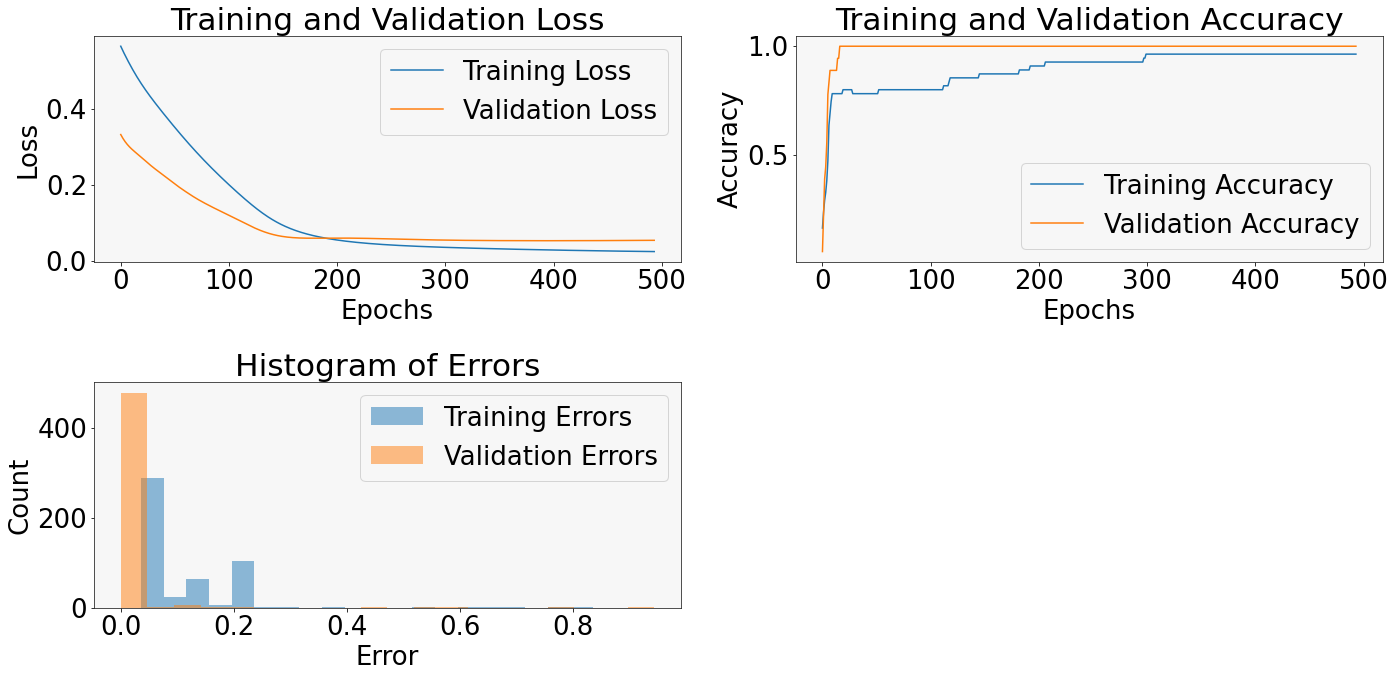

In [187]:
# create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]

# plot the training and validation loss on the first subplot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# plot the training and validation accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# plot a histogram of the errors on a third subplot
errors = [1-acc for acc in history.history['accuracy']]
val_errors = [1-acc for acc in history.history['val_accuracy']]
ax3.hist(errors, bins=20, alpha=0.5, label='Training Errors')
ax3.hist(val_errors, bins=20, alpha=0.5, label='Validation Errors')
ax3.set_xlabel('Error')
ax3.set_ylabel('Count')
ax3.set_title('Histogram of Errors')
ax3.legend()

# remove the unused subplot
fig.delaxes(axes[1, 1])

# adjust the layout and display the figure
fig.tight_layout()
plt.show()

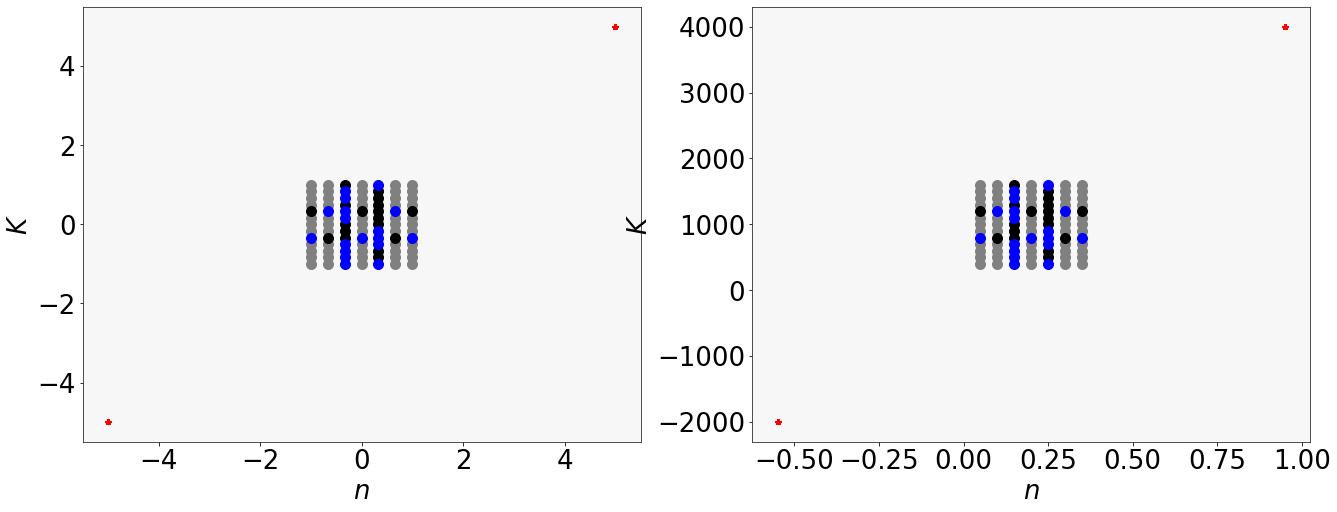

In [188]:
fig_ANN, (ax1_ANN, ax2_ANN) = plt.subplots(1,2)

ax1_ANN.plot(Y_train_scaled[:,1], Y_train_scaled[:,0], 'o', markersize=10, color='gray', label="training points") # show training data
ax1_ANN.plot(Y_test_scaled[:,1], Y_test_scaled[:,0], 'o', markersize=10, color='black', label="testing points") # show training data
ax1_ANN.plot(Y_val_scaled[:,1], Y_val_scaled[:,0], 'o', markersize=10, color='blue', label="testing points") # show validation data
ax1_ANN.plot(Y_data_ANNpred_scaled[:,1], Y_data_ANNpred_scaled[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax1_ANN.set_ylabel('$K$')
ax1_ANN.set_xlabel('$n$')

ax2_ANN.plot(Y_train[:,1], Y_train[:,0], 'o', markersize=10, color='gray', label="training points") # show training data
ax2_ANN.plot(Y_test[:,1], Y_test[:,0], 'o', markersize=10, color='black', label="testing points") # show training data
ax2_ANN.plot(Y_val[:,1], Y_val[:,0], 'o', markersize=10, color='blue', label="testing points") # show validation data
ax2_ANN.plot(Y_data_ANNpred[:,1], Y_data_ANNpred[:,0], marker='*', linestyle='none', color='red', label="Neural Network prediction") # plot prediction
ax2_ANN.set_ylabel('$K$')
ax2_ANN.set_xlabel('$n$')
# ax2_ANN.legend(loc='best')
# ax2_ANN.set_xlim([0, 0.4])
# ax2_ANN.set_ylim([200, 1800])
#ax2_ANN.grid(True, color='gray', linestyle='-')
# Create figure with specified size
fig_ANN.set_size_inches(22, 8)


In [ ]:
score = ANN_model.score(X_test_scaled, Y_test_scaled)
print("Test Score: %.2f MSE" % score)

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super

In [ ]:
# As expected, the code for multidimensional ANNs is basically the same as the 1D case.
from tensorflow import keras
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from tensorflow.keras import activations # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers.core import Dense # to create a feedforward neural network with dense layers
from keras.wrappers.scikit_learn import KerasRegressor # a new version will use scikeras
from keras.callbacks import EarlyStopping # a strategy for complexity control
from sklearn.model_selection import GridSearchCV # simple (brute force) approach to find better hyperparameters.
from sklearn.metrics import r2_score # Import error metrics
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
#
# Function to create the ANN model
def create_ANN(input_dimensions=1,neurons1=5,neurons2=5,neurons3=5,neurons4=5,neurons5=5,
                 activation=activations.tanh,optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(neurons3, activation=activation)) # UNCOMMEND If you want a third hidden layer
    model.add(Dense(neurons4, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(neurons5, activation=activation)) # UNCOMMENT if you want a fourth hidden layer, etc.
    model.add(Dense(2, activation = 'linear')) # output layer with just 2 neuronS
    model.compile(loss='mse', optimizer=optimizer ) # choose error metric and optimizer.
    return model

In [ ]:
# If you don't want to use Early Stopping, then comment the command below.
early_stopping = EarlyStopping(monitor='val_loss', # use validation error to check if training should stop early
                               min_delta=0, # minimum change in the monitored quantity to qualify as an
                                              # improvement (if 0, then even small improvements count)
                               patience=100, # be patient for a few epochs to verify evolution of loss
                               mode='min'
                               ) # in min mode, training stops when val_loss stops decreasing
# Summary of this early_stopping criterion:
# stop training when there is no improvement in the loss for 30 consecutive epochs.

neurons1=5 # number of neurons in hidden layer 1
neurons2=5 # number of neurons in hidden layer 2
neurons3=5 # number of neurons in hidden layer 3
neurons4=5 # number of neurons in hidden layer 4
neurons5=5 # number of neurons in hidden layer 5
epochs = 1000 # number of epochs
batch_size = len(X_train) # number of samples in each batch
#optimizer= SGD(lr=0.01, momentum=0.9)
#optimizer = Adagrad(lr=0.01, epsilon=None, decay=0.0)
optimizer = Adam(learning_rate=0.001)
                 
                 #, epsilon=None, decay=0.0, amsgrad=False)

ANN_model = KerasRegressor(build_fn=create_ANN, # the function where we define our ANN
                           input_dimensions=np.shape(X_train)[1], # the input dimensions (here it is 2)
                           neurons1=neurons1, # number of neurons in the first hidden layer
                           neurons2=neurons2, # number of neurons in the second hidden layer
                           neurons3=neurons3, # number of neurons in the third hidden layer
                           neurons4=neurons4, # number of neurons in the fourth hidden layer
                           neurons5=neurons5, # number of neurons in the fifth hidden layer
                           batch_size=batch_size, # define the number of samples in each batch
                           epochs=epochs, # number of epochs
                           optimizer=optimizer, # optimizer
                           callbacks=[early_stopping], # include early stopping
                           validation_data=(X_val_scaled, Y_val_scaled)) # validation data to compute loss
# Train the model:
history = ANN_model.fit(X_train_scaled, Y_train_scaled, verbose=1)

In [ ]:
# Get the weights and biases for the first layer
print(history.
      )
